In [6]:
#Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import datetime
import scipy.stats as stats
import warnings

In [7]:
# Import Data
data = pd.read_csv("D:/TRAINING/CISCO/Sales_wireless.csv", sep=";", encoding="unicode_escape")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2395 non-null   object 
 1   Item                       2395 non-null   object 
 2   SKU_Category               2395 non-null   object 
 3   Concatenate_ID             2395 non-null   object 
 4   Sales_Percent              2395 non-null   float64
 5   Sales_Amount               2395 non-null   int64  
 6   Cost                       2393 non-null   float64
 7   Gross_Profit               2395 non-null   int64  
 8   Commission_Cost            2395 non-null   int64  
 9   Retail_Net_Earnings        2395 non-null   int64  
 10  Profit_Ratio               2395 non-null   float64
 11  Net_Earnings               2395 non-null   int64  
 12  Cost_to_Profit_Ratio       2395 non-null   float64
 13  Cost_Ratio                 2395 non-null   float

In [8]:
#Data
data['Month']=data['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').strftime('%m/%Y'))
data['Day']=data['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').strftime('%d/%m/%Y'))
data['Year']=data['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').strftime('%Y'))
data

,Date,Item,SKU_Category,Concatenate_ID,Sales_Percent,Sales_Amount,Cost,Gross_Profit,Commission_Cost,Retail_Net_Earnings,...,Net_Earnings,Cost_to_Profit_Ratio,Cost_Ratio,Profit_Contribution_Ratio,Company,Category,Agent,Month,Day,Year
0,01/08/2022,Phone Case,TXTA,SA-0202280001-TXTA,0.0004,25,5.0,20,8,12,...,12,0.2500,0.2000,0.0005,Castify,Tech Accessories,STKEVON,08/2022,01/08/2022,2022
1,01/08/2022,Protective Glass,TXTA,SA-202280002-TXTA,0.0003,20,2.0,18,7,11,...,11,0.1111,0.1000,0.0005,Castify,Tech Accessories,STKEVON,08/2022,01/08/2022,2022
2,01/08/2022,Type C Cable,TXTA,SA-202280003-TXTA,0.0002,15,6.0,9,4,5,...,5,0.6667,0.4000,0.0002,Apple,Tech Accessories,STKEVON,08/2022,01/08/2022,2022
3,01/08/2022,Data Transfer Service,SFSV,SA-202280004-SFSV,0.0003,20,0.0,20,8,12,...,12,0.0000,0.0000,0.0005,EY Cell,Software Service,STKEVON,08/2022,01/08/2022,2022
4,01/08/2022,iphone X screen repair,DVRP,SA-202280005-DVRP,0.0013,80,42.0,38,15,23,...,23,1.1053,0.5250,0.0010,InCell,Device Repair,STKEVON,08/2022,01/08/2022,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,30/11/2022,Phone Case and Protective Glass,TXTA,SA-202282391-TXTA,0.0003,20,5.0,15,6,9,...,9,0.3333,0.2500,0.0004,Temu,Tech Accessories,STKYOSEF,11/2022,30/11/2022,2022
2391,30/11/2022,LycaMobile 1 month 2 GB,WIRLSVS,SA-202282392-WIRLSVS,0.0003,21,18.0,3,1,2,...,2,5.2130,0.8390,0.0001,LycaMobile,Wireless Service,STKWAN,11/2022,30/11/2022,2022
2392,30/11/2022,Charging Cable,TXTA,SA-202282393-TXTA,0.0002,15,7.0,8,3,5,...,5,0.8750,0.4667,0.0002,Castify,Tech Accessories,STKEVON,11/2022,30/11/2022,2022
2393,30/11/2022,SanDisk Flash Drive,TXTA,SA-202282394-TXTA,0.0007,45,22.0,23,9,14,...,14,0.9780,0.4944,0.0006,SanDisk,Tech Accessories,STKANSON,11/2022,30/11/2022,2022


# Sales Performance

In [9]:
#Data
data2=data
data2['Day']=data2['Date'].str[0:2]
data2['Month']=data2['Date'].str[3:5]

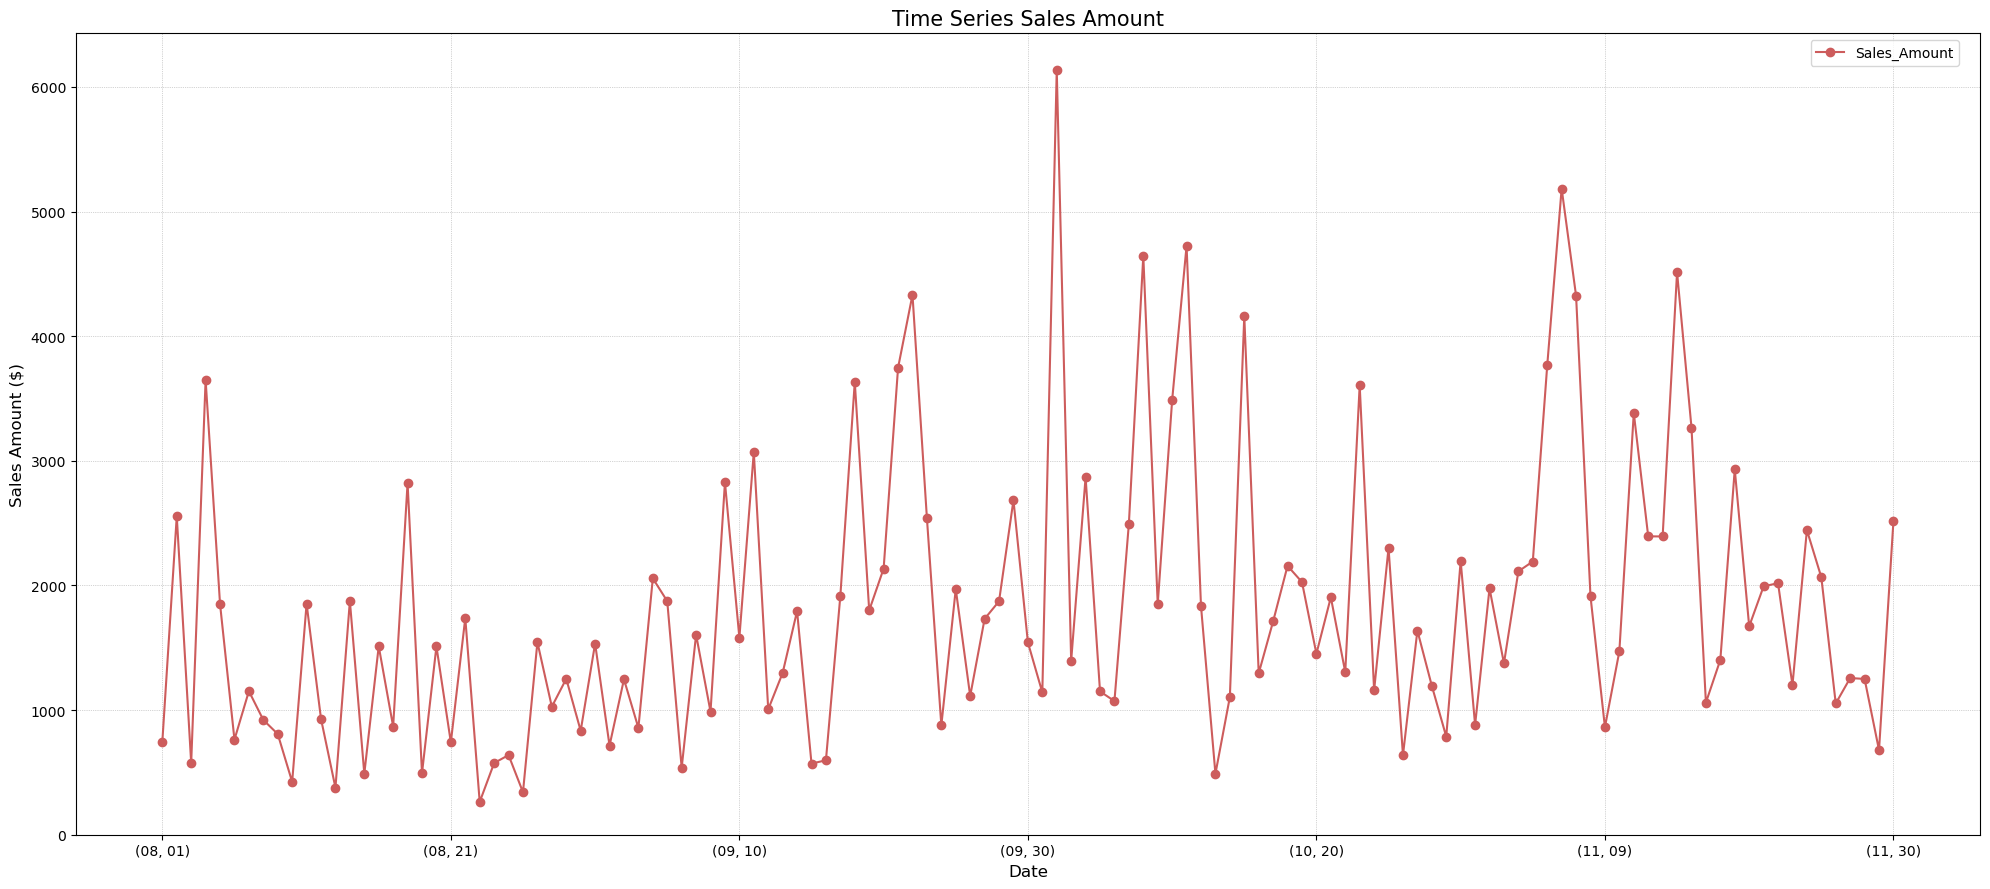

In [46]:
#Plot 1
data2.groupby(['Month','Day'])['Sales_Amount'].sum().plot(marker='o',color='indianred')
plt.title('Time Series Sales Amount',loc='center', fontsize=15, color='black')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Sales Amount ($)',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.95, 1), shadow=False, ncol=1)
plt.gcf().set_size_inches(20, 9)
plt.tight_layout()

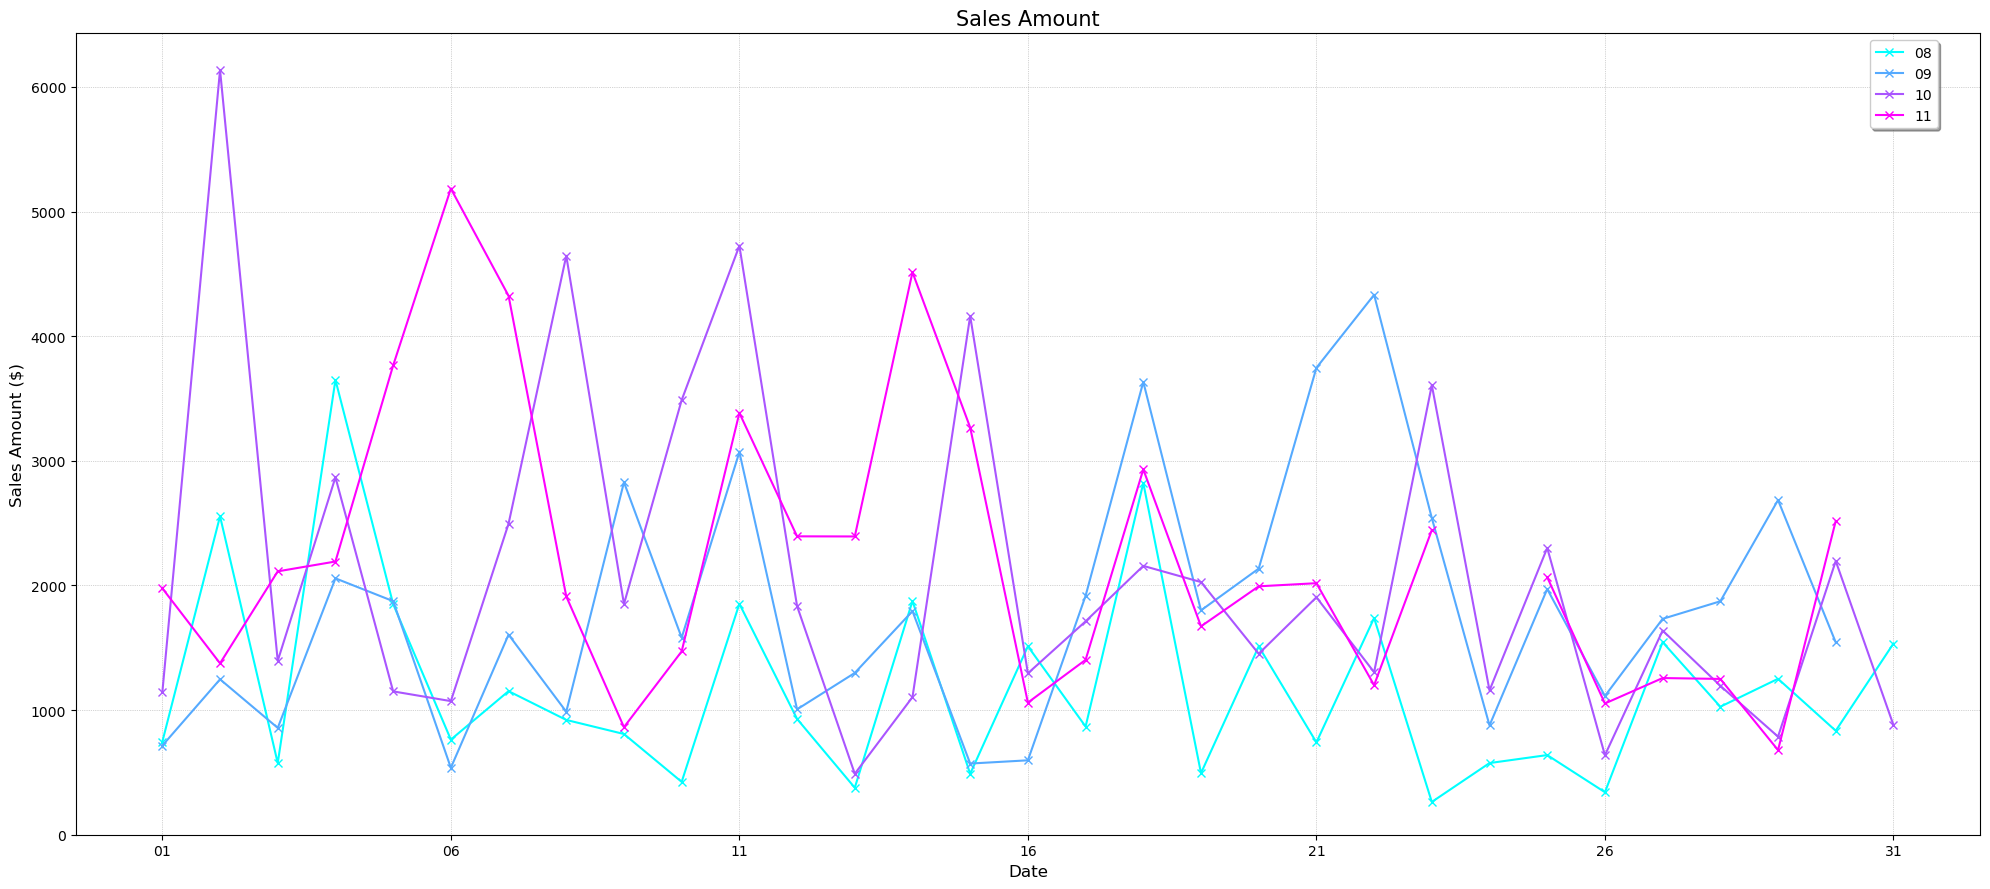

In [47]:
#Plot 2
data.groupby(['Day', 'Month'])['Sales_Amount'].sum().unstack().plot(marker='x',cmap='cool')
plt.title('Sales Amount',loc='center', fontsize=15, color='black')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Sales Amount ($)',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.96, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(20, 9)
plt.tight_layout()

# Agent Performance 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'STKEVON'),
  Text(1, 0, 'STKANSON'),
  Text(2, 0, 'STKYOSEF'),
  Text(3, 0, 'STKWAN')])

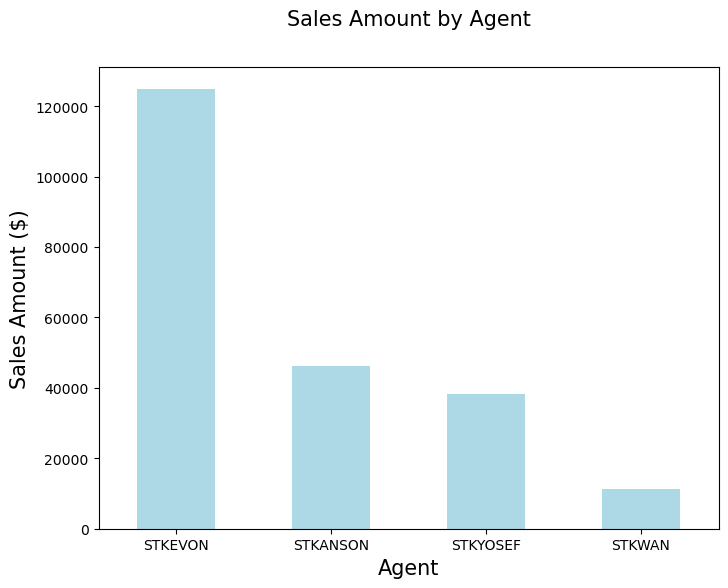

In [13]:
#Plot
fig, ax = plt.subplots(figsize=(8, 6))

data.groupby(['Agent'])['Sales_Amount'].sum().sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.title('Sales Amount by Agent',loc='center',pad=30, fontsize=15, color='black')
plt.xlabel('Agent', fontsize = 15)
plt.ylabel('Sales Amount ($)',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)

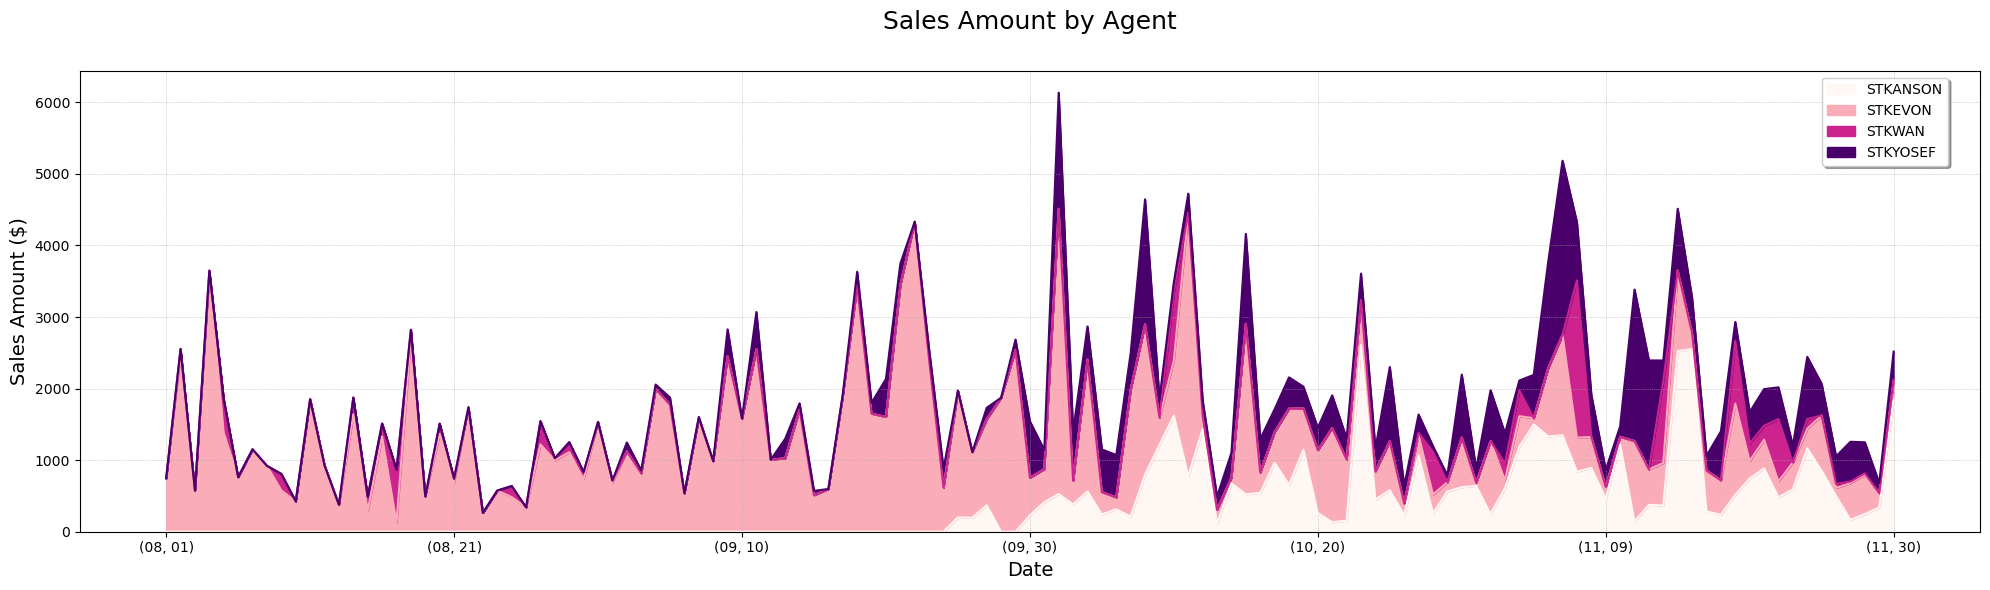

In [48]:
#Data
data3=data
data3['Day']=data3['Date'].str[0:2]
data3['Month']=data3['Date'].str[3:5]
#Plot
data3.groupby(['Month','Day','Agent'])['Sales_Amount'].sum().unstack().plot.area(cmap='RdPu')
plt.title('Sales Amount by Agent',loc='center',pad=30, fontsize=18, color='black')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Sales Amount ($)',fontsize = 14)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.95, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(20, 6)
plt.tight_layout()

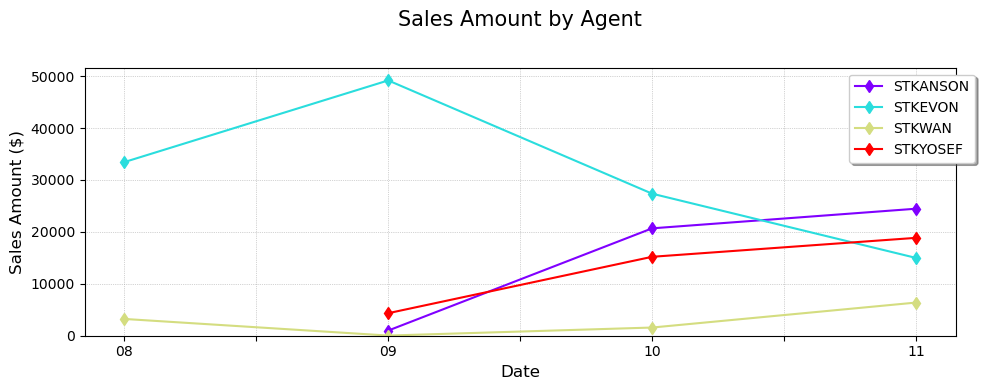

In [31]:
#Data
datagroup=data.groupby(['Month','Agent'])[['Sales_Amount']].sum()
datagroup
#Plot
data.groupby(['Month','Agent'])['Sales_Amount'].sum().unstack().plot(marker='d', cmap='rainbow')
plt.title('Sales Amount by Agent',loc='center',pad=30, fontsize=15, color='black')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Sales Amount ($)',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.95, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(10, 4)
plt.tight_layout()

# Sales Analysis

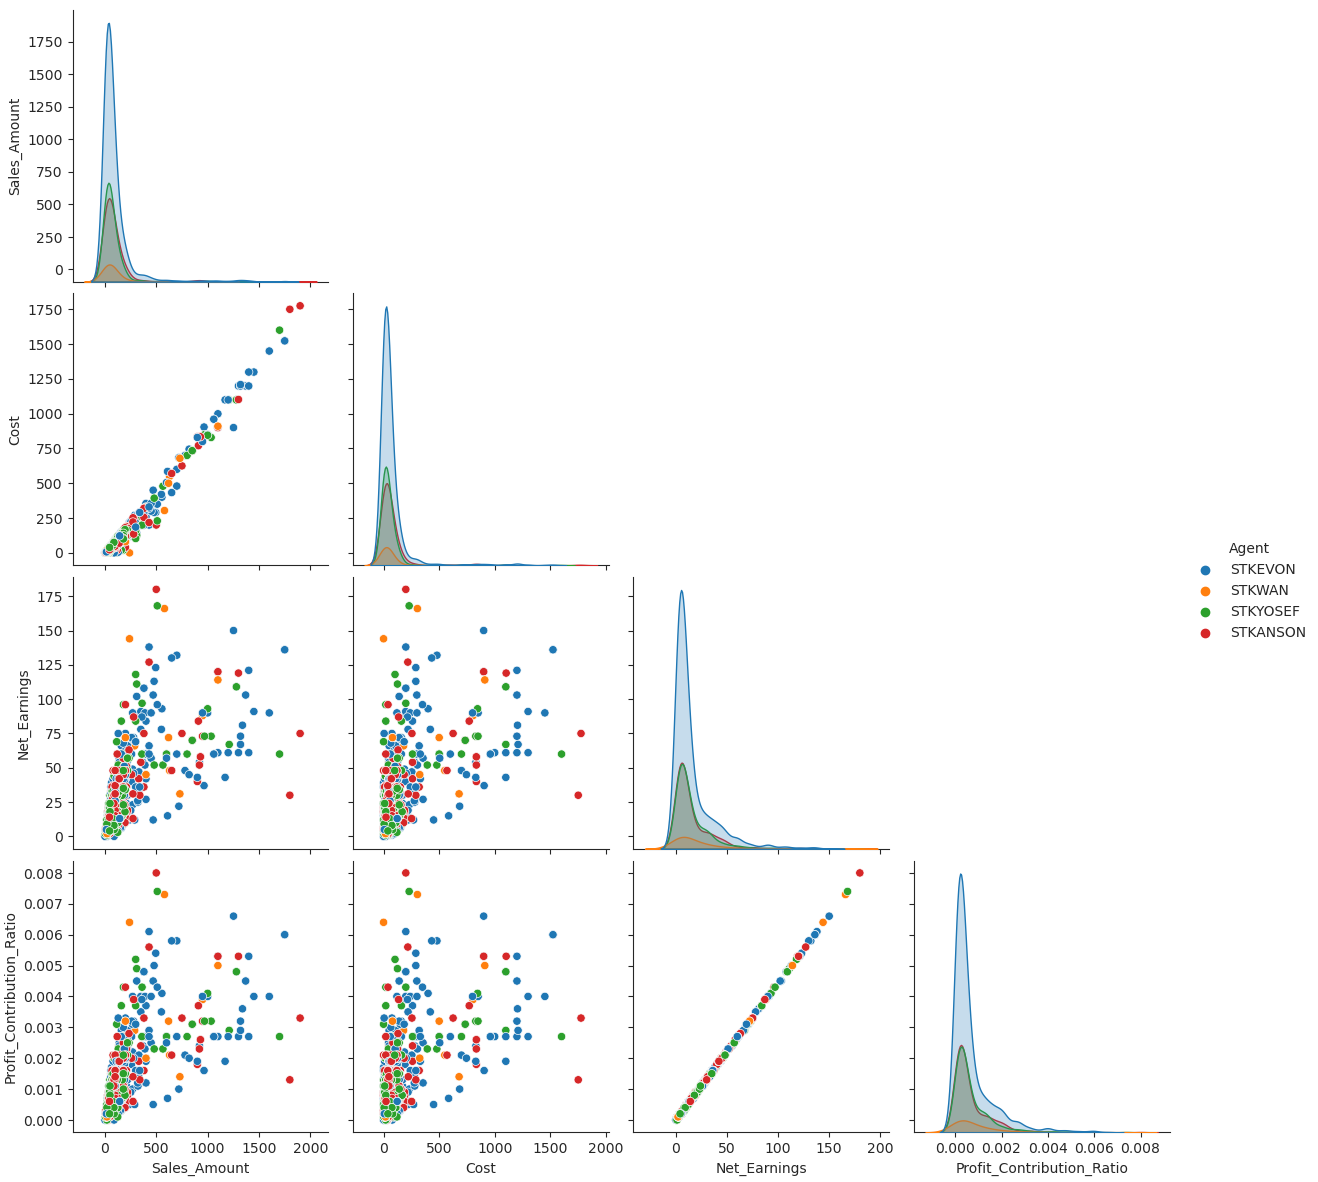

In [15]:
# Data
datajoin = data[['Sales_Amount', 'Cost', 'Net_Earnings', 'Profit_Contribution_Ratio', 'Agent']]
warnings.filterwarnings('ignore')

# Plot
with sns.axes_style('ticks'):
    plot = sns.pairplot(datajoin, hue='Agent',
                       hue_order=['STKEVON', 'STKWAN', 'STKYOSEF', 'STKANSON'],
                       height=3,
                       markers=['o']
                      )

    for i, j in zip(*np.triu_indices_from(plot.axes, 1)):
        plot.axes[i, j].set_visible(False)

# Show the plot
plt.show()


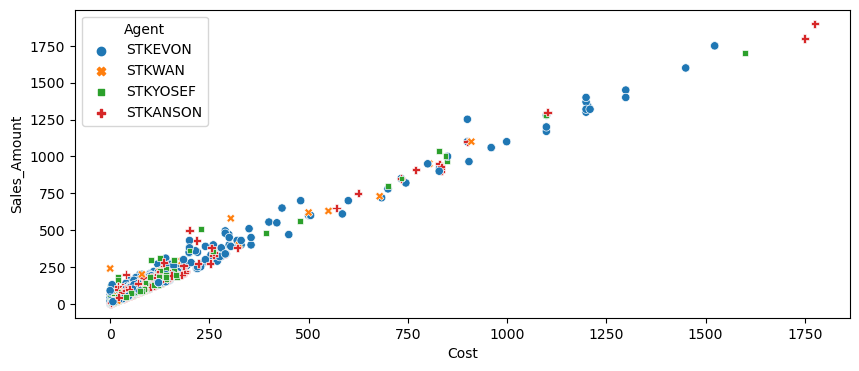

In [49]:
#Plot
sns.scatterplot(data=data, x='Cost', y='Sales_Amount', hue = 'Agent', style = 'Agent')
plt.gcf().set_size_inches(10, 4)

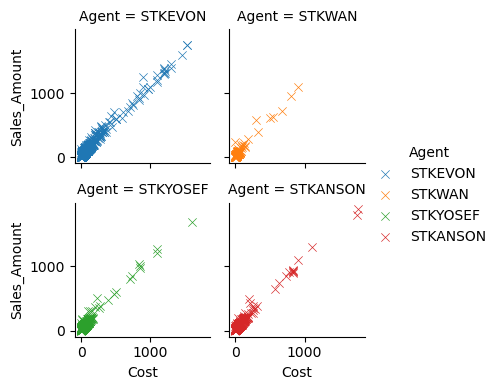

In [59]:
#Plot
g = sns.FacetGrid(data, col="Agent", col_wrap=2, hue="Agent", height=2)
b = g.map_dataframe(sns.scatterplot, x="Cost", y="Sales_Amount", marker="x")
g.add_legend()

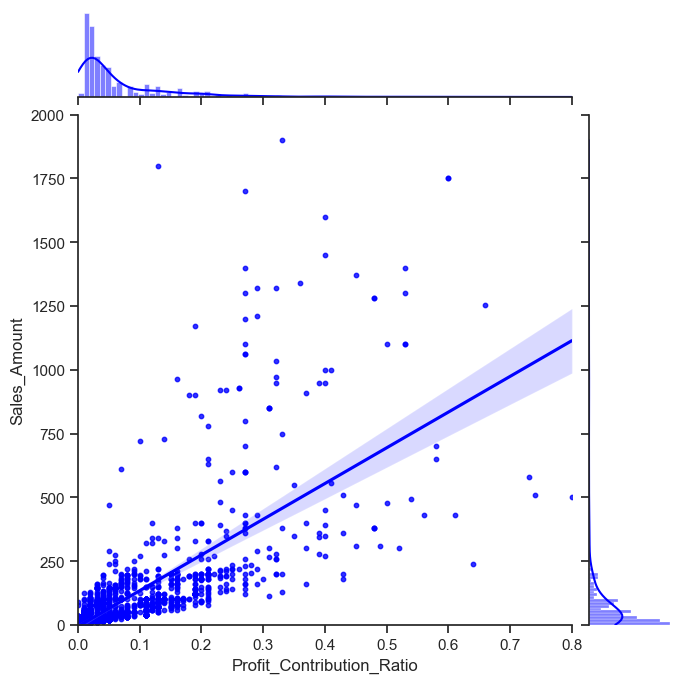

In [38]:
# Data
x = data['Profit_Contribution_Ratio'] * 100
y = data['Sales_Amount']

# Plot
sns.set(style='ticks')
sns.jointplot(x=x, y=y, kind='reg', xlim=(0, 0.8), ylim=(0, 2000), height=7, scatter_kws={"s": 10}, color="blue", line_kws={"color": "blue"})


# 

# 

# Supplier Analysis

In [15]:
databar = data.groupby(['Company'])[['Sales_Amount']].sum()
dataline = data.groupby(['Company'])[['Net_Earnings']].sum()
databar
dataline
databar['Net_Earnings']=dataline
databar2=databar.sort_values(['Sales_Amount'],ascending=False)
databar2.style.highlight_max(color = 'red', axis=0)

,Sales_Amount,Net_Earnings
Company,,
Apple,98082,12475
LycaMobile,36679,6006
UltraMobile,28986,2795
InCell,12775,4433
Samsung,7579,1885
H20,6817,1294
Castify,6633,2624
Unblock,4851,796
SimpleMobile,3995,322


In [16]:
#Data
datasup=data.groupby(['Company'])[['Profit_Contribution_Ratio']].sum()
datasup.sort_values(['Profit_Contribution_Ratio'], ascending=False).head(10)

,Profit_Contribution_Ratio
Company,
Apple,0.5534
LycaMobile,0.2705
InCell,0.1966
UltraMobile,0.1227
Castify,0.1170
EY Cell,0.0885
Samsung,0.0833
H20,0.0567
TMobile,0.0430


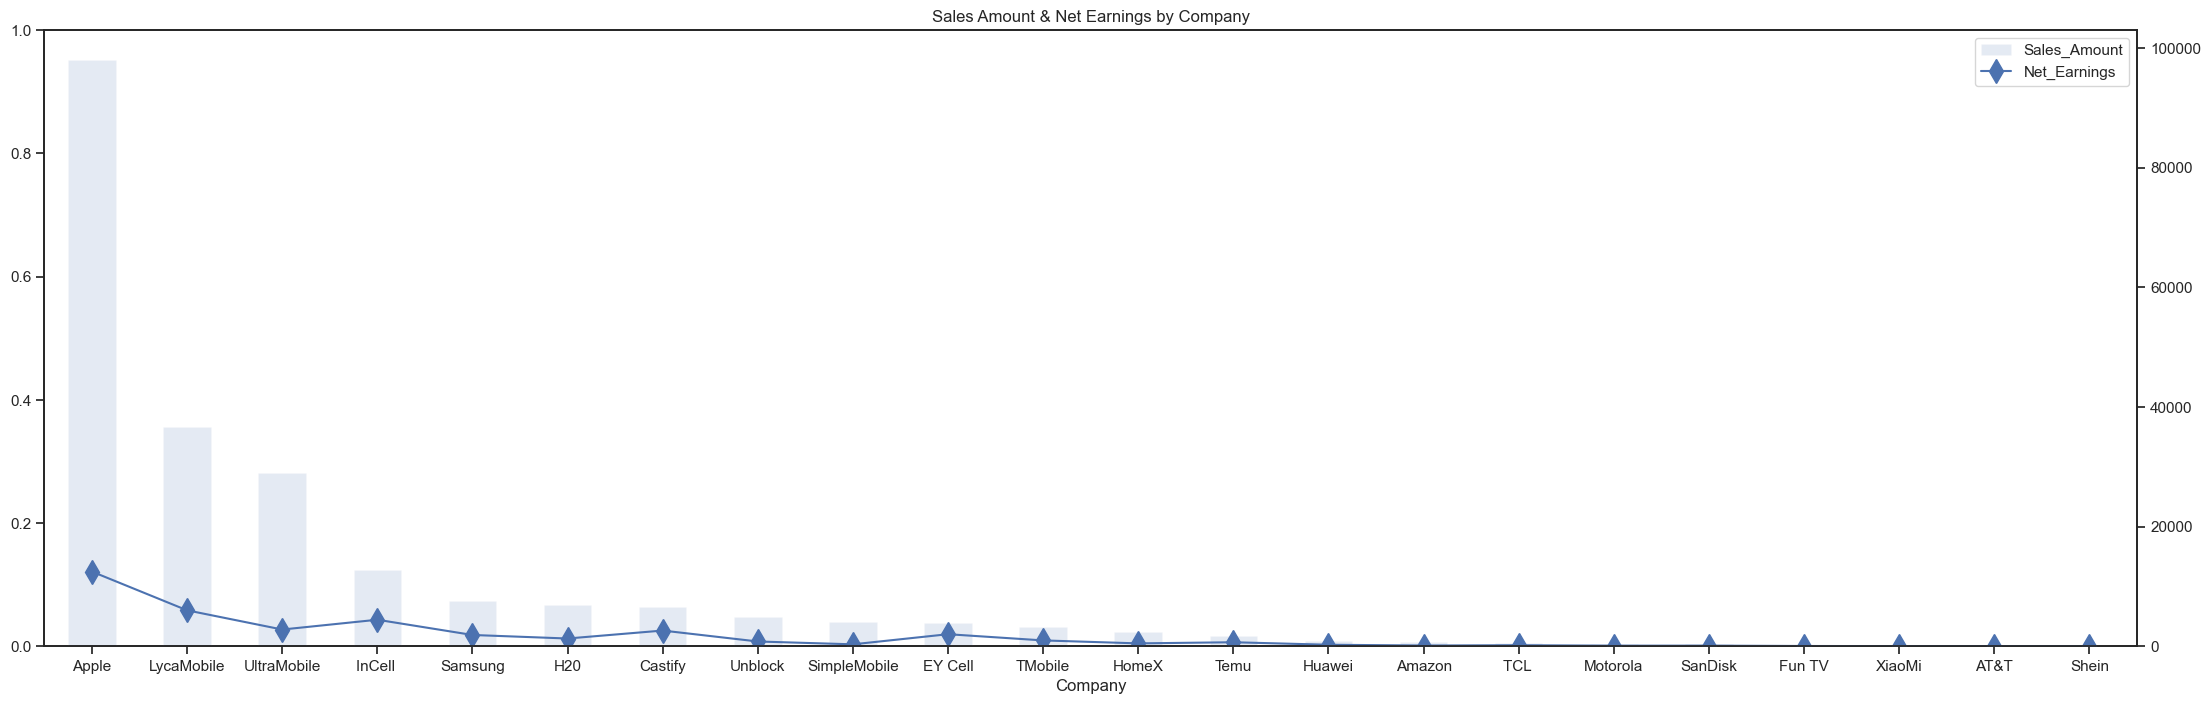

In [17]:
# Plot 1
fig2, ax = plt.subplots(figsize=(12,8))
ax2 = ax.twinx()
df2 = databar2.plot(kind='bar', y='Sales_Amount', ax=ax2,stacked=False,alpha = .15)
df2 = databar2.plot(kind='line',y='Net_Earnings', ax=ax2,marker='d', markersize=12)
ax.set_xlabel('Company')
ax.set_title('Sales Amount & Net Earnings by Company')
plt.gcf().set_size_inches(27, 8)

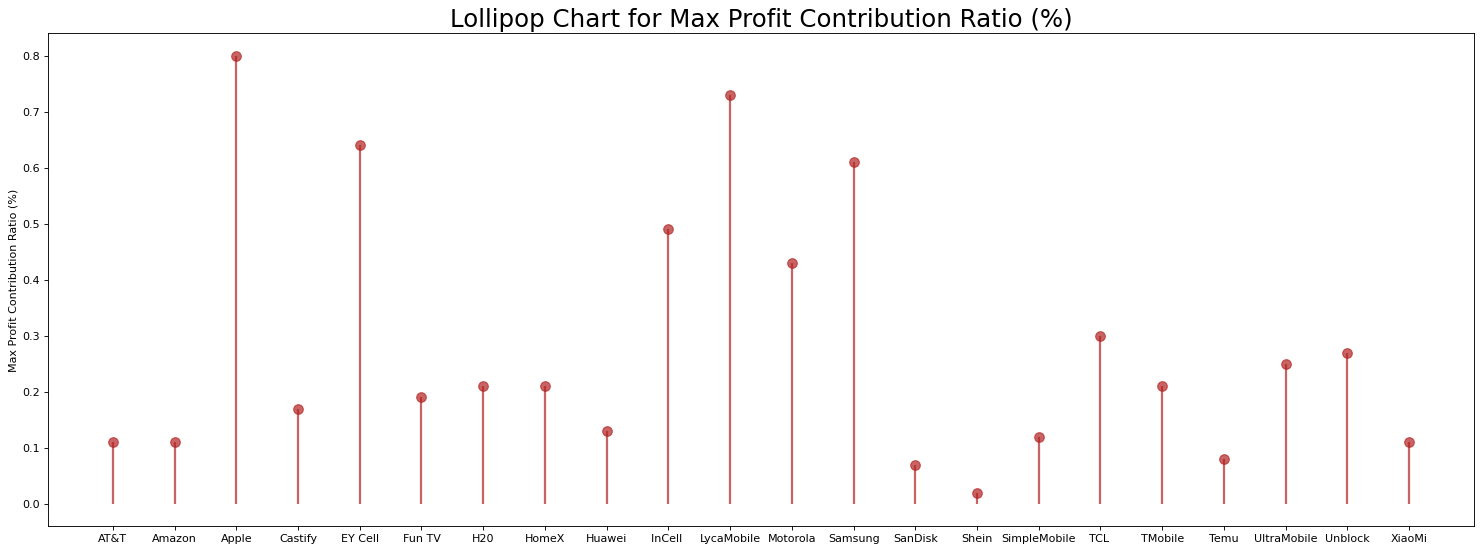

In [38]:
# Data
dfstack = data.groupby(['Company'])[['Profit_Contribution_Ratio']].max()
dfstack.style.highlight_max(color = 'red', axis=0)
dfnew= {'Company': ['AT&T','Amazon','Apple','Castify','EY Cell','Fun TV','H20','HomeX','Huawei','InCell ','LycaMobile','Motorola','Samsung',
   'SanDisk','Shein','SimpleMobile','TCL ','TMobile','Temu','UltraMobile','Unblock','XiaoMi']}
dfnew=pd.DataFrame(dfnew)
dfstack['Company']=dfnew
#Plot 2
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=dfnew.Company, ymin=0, ymax=dfstack.Profit_Contribution_Ratio*100, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=dfnew.Company, y=dfstack.Profit_Contribution_Ratio*100, s=75, color='firebrick', alpha=0.7)
ax.set_title('Lollipop Chart for Max Profit Contribution Ratio (%)', fontdict={'size':22})
ax.set_ylabel('Max Profit Contribution Ratio (%)')
ax.set_xticks(dfnew.Company)
plt.gcf().set_size_inches(23, 8)

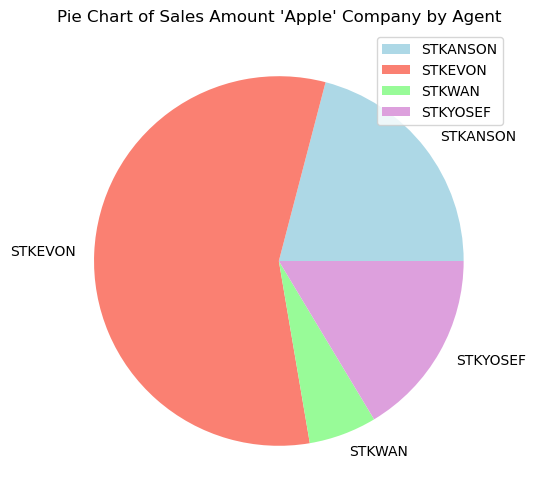

In [28]:
# Prepare Data
dataApple=data[data['Company']=='Apple'][['Agent','Sales_Amount','Category']]
dataApple1=dataApple.groupby(['Agent'])[['Sales_Amount']].sum()

#Plot 3
colors = ('lightblue','salmon','palegreen','plum')
dataApple1.plot(kind='pie', subplots=True, figsize=(12, 6), colors = colors)
plt.title("Pie Chart of Sales Amount 'Apple' Company by Agent")
plt.ylabel("")
plt.show()

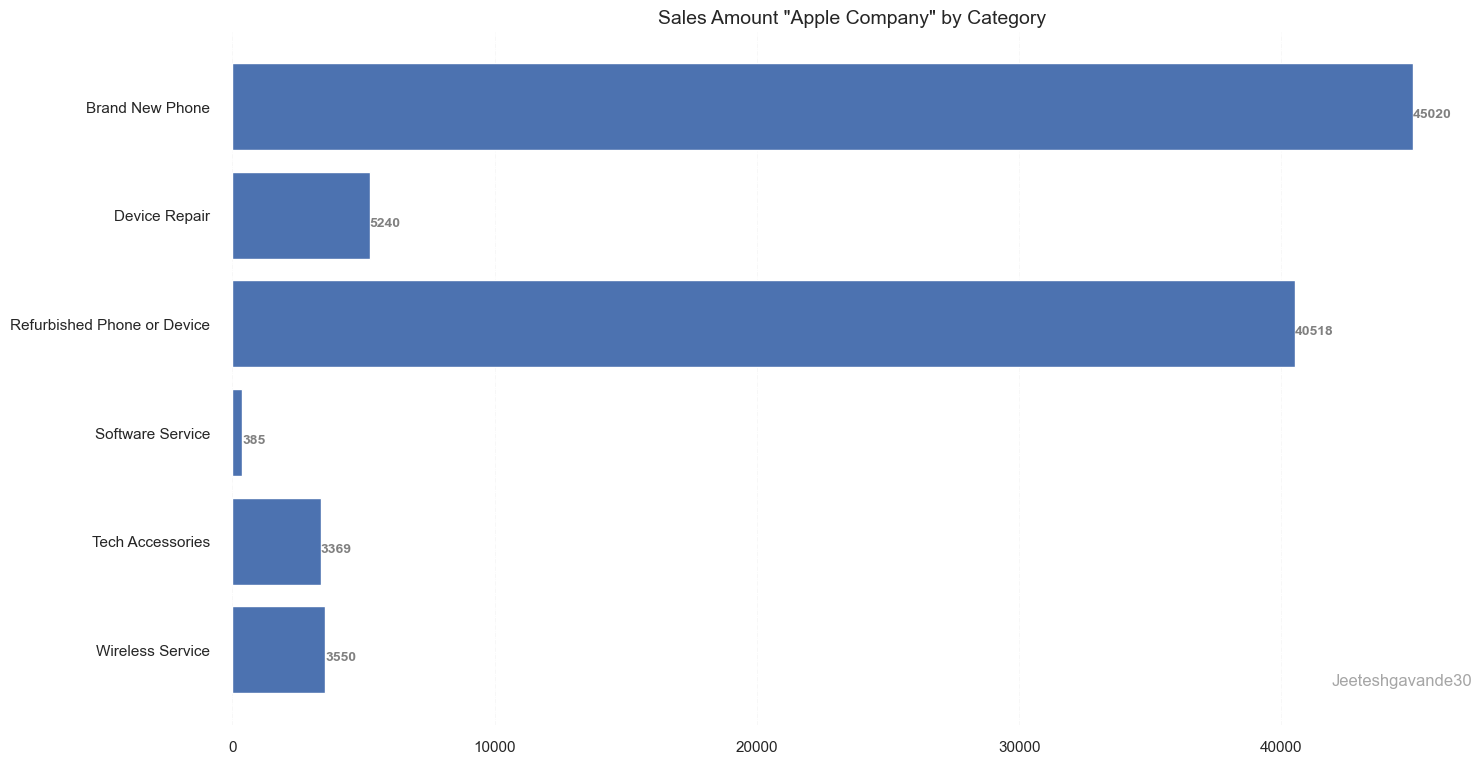

In [41]:
# Prepare Data
dataApple2 = dataApple.groupby(['Category'])[['Sales_Amount']].sum()
Category = ['Brand New Phone', 'Device Repair', 'Refurbished Phone or Device', 'Software Service', 'Tech Accessories', 'Wireless Service']
Sales = [45020, 5240, 40518, 385, 3369, 3550]

# Plot 4
# Fig Size
fig4, ax = plt.subplots(figsize=(16, 9))

# Horizontal Bar Plot
ax.barh(Category, Sales)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x, y gridlines
ax.grid(axis='x', linestyle='-.', linewidth=0.5, alpha=0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width() + 0.2, i.get_y() + 0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')

# Add Plot Title
ax.set_title('Sales Amount "Apple Company" by Category',
             loc='center', fontsize=14)

# Add Text watermark
fig4.text(0.9, 0.15, 'Jeeteshgavande30', fontsize=12,
          color='grey', ha='right', va='bottom',
          alpha=0.7)

# Show Plot
plt.show()


# Segment Analysis

In [19]:
dataseg=data.groupby(['Category'])[['Cost']].median()
dataseg.style.highlight_max(color = 'red', axis=0)

,Cost
Category,
Brand New Phone,829.000000
Device Repair,20.000000
Refurbished Phone or Device,135.000000
Software Service,0.000000
TV Box,140.000000
Tech Accessories,4.000000
Wireless Service,47.000000


In [20]:
dataseg['Profit_Contribution_Ratio']=data.groupby(['Category'])[['Profit_Contribution_Ratio']].sum()
dataC= {'Category': ['Brand New Phone', 'Device Repair', 'Refurbished Phone or Device', 'Software Service', 'TV Box','Tech Accessories','Wireless Service'],
        'Cost' : [829.0,20.0,135.0,0.0,140.0,4.0,47.0],
        'Profit_Contribution_Ratio': [0.1789,0.3313,0.3238,0.0651,0.0557,0.1898,0.5245]}

df = pd.DataFrame(dataC)
df.style.highlight_max(color = 'red', axis=0)


,Category,Cost,Profit_Contribution_Ratio
0,Brand New Phone,829.000000,0.178900
1,Device Repair,20.000000,0.331300
2,Refurbished Phone or Device,135.000000,0.323800
3,Software Service,0.000000,0.065100
4,TV Box,140.000000,0.055700
5,Tech Accessories,4.000000,0.189800
6,Wireless Service,47.000000,0.524500


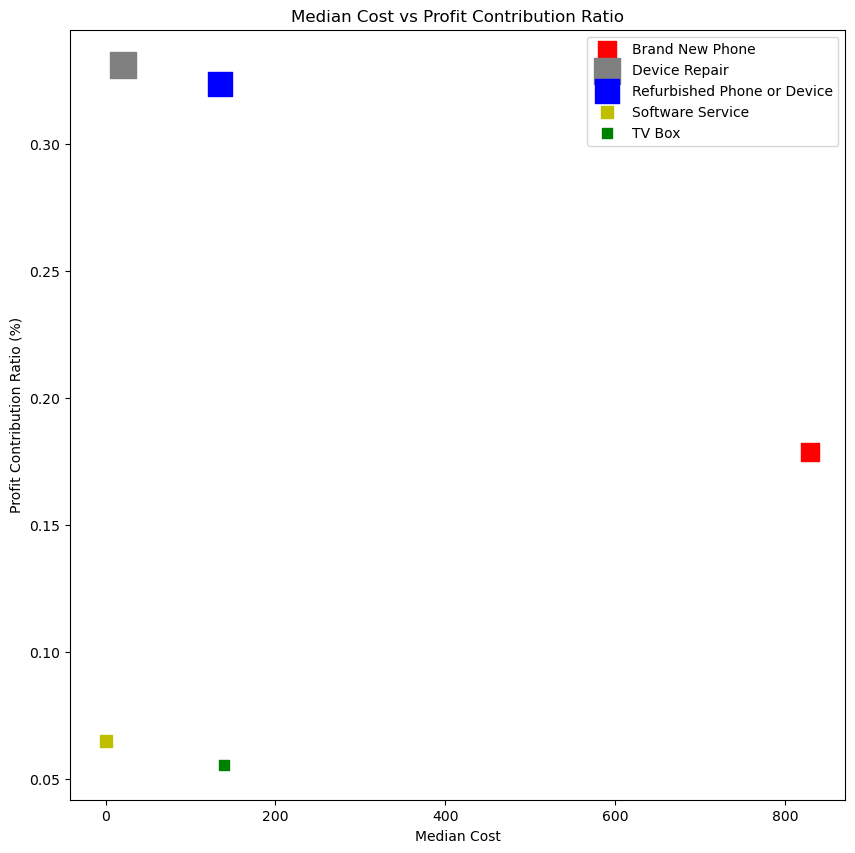

In [66]:
#Prepare Data
x=df['Cost']
y=df['Profit_Contribution_Ratio']
l=df['Category']

#Plot 1
fig3, ax = plt.subplots(figsize=(12,8))
ax.scatter(x[0], y[0], marker='s', s=178, color='r', label=l[0])
ax.scatter(x[1], y[1], marker='s', s=331, color='grey', label=l[1])
ax.scatter(x[2], y[2], marker='s', s=323, color='blue', label=l[2])
ax.scatter(x[3], y[3], marker='s', s=65, color='y', label=l[3])
ax.scatter(x[4], y[4], marker='s', s=55, color='green', label=l[4])
ax.set_ylabel('Profit Contribution Ratio (%)')
ax.set_title('Median Cost vs Profit Contribution Ratio')
ax.set_xlabel('Median Cost')
ax.legend(loc='upper right',bbox_to_anchor=(1,1))
plt.gcf().set_size_inches(10, 10)

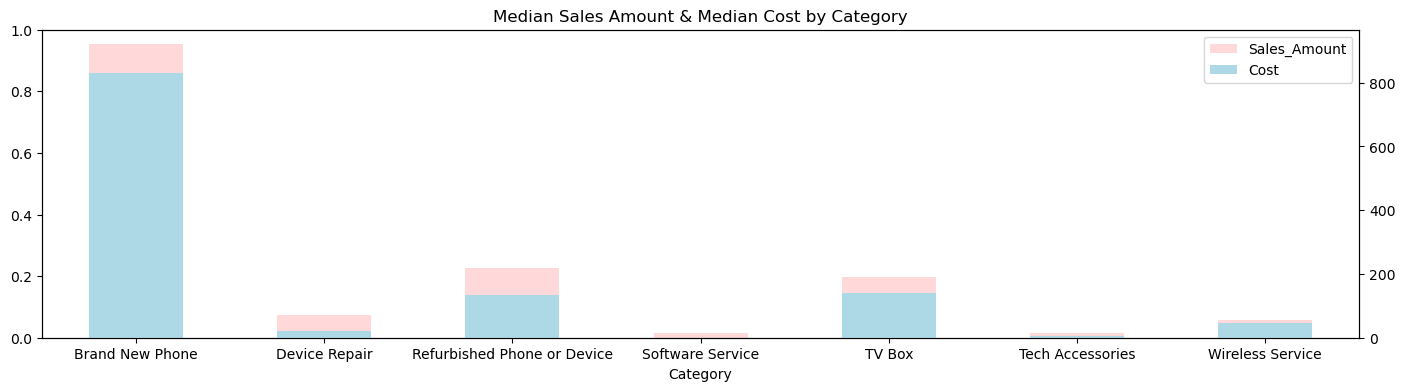

In [65]:
#Prepare Data
datanew=data.groupby(['Category'])[['Sales_Amount','Cost']].median()

#Plot 2
fig2, ax = plt.subplots(figsize=(12,8))
ax2 = ax.twinx()
df3 = datanew.plot(kind='bar', y='Sales_Amount', ax=ax2,color= 'red',stacked=False,alpha = .15)
df3 = datanew.plot(kind='bar',y='Cost', ax=ax2, color = 'lightblue')
ax.set_xlabel('Category')
ax.set_title('Median Sales Amount & Median Cost by Category')
plt.gcf().set_size_inches(17, 4)


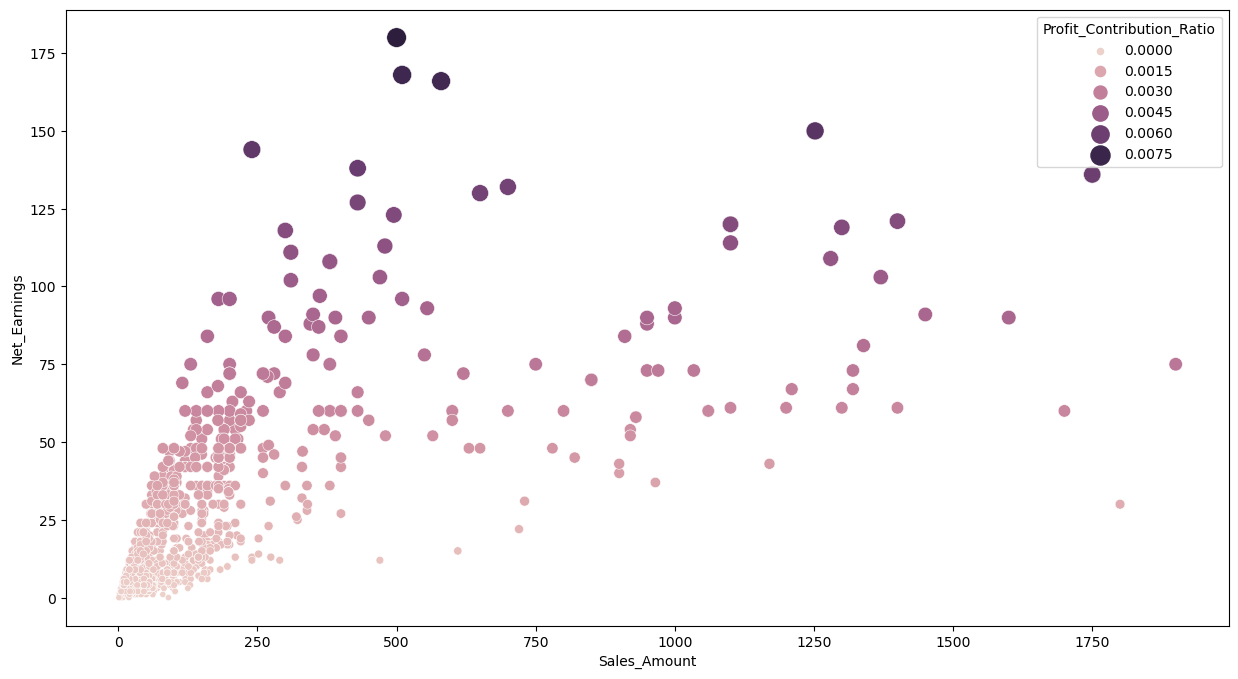

In [63]:
#Plot
sns.scatterplot(
    data=data, x="Sales_Amount", y="Net_Earnings", hue="Profit_Contribution_Ratio", size="Profit_Contribution_Ratio",
    sizes=(20, 200), legend="brief"
)
plt.gcf().set_size_inches(15, 8)